In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [2]:
data = pd.read_csv('./FE_data/data.csv')

In [3]:
data.columns

Index(['role_id', 'r1', 'r2', 'r3', 'r4', 'max_role_level', 'p1', 'p2', 'p3',
       'p4', 'p5', 'p6', 'is_create_role', 'is_create_no', 'server_sum',
       'platform', 'user_type', 'user_flag', 'mobile', 'game_pay_num',
       'chmoney_pay_num', '30d_pay_money'],
      dtype='object')

role_id  -  角色id
r1  -  role_id本周登录次数
r2  -  role_id本周登录的设备数
r3  -  role_id本周使用的ip数
r4  -  role_id本周登录的平均时间间隔r4 按小时
max_role_level  -  角色前7天最大等级
p1  -  前7天充值总次数
p2  -  前7天充值总金额
p3  -  前7天充值give_money次数
p4  -  前7天充值give_money总金额
p5  -  前7天充值rmb_money次数
p6  -  前7天充值rmb_money总金额
is_create_role  -  是否在一个游戏创建第一个角色
is_create_no  -  是否在一个新设备创建第一个角色
server_sum  -  玩家玩过的服务器个数
platform  -  游戏平台（1：安卓平台；2：IOS平台）
user_type  -  账号类型（1：普通账号；2：手机账号）
user_flag  -  用户类型（1：官方用户；2：非官方用户）
mobile  -  是否绑定手机1： 是  0: 否
game_pay_num  -  游戏付费次数
chmoney_pay_num  -  草花付费次数
30d_pay_money  -  注册前30天付费金额 target

In [4]:
numeric_features = ['r1', 'r2', 'r3', 'r4', 'max_role_level', 'p1', 'p2', 'p3',
       'p4', 'p5', 'p6','server_sum','game_pay_num','chmoney_pay_num']
categorical_features = np.setdiff1d(data.columns, numeric_features.append('30d_pay_money'))

In [5]:
data.head().append(data.tail())

,role_id,r1,r2,r3,r4,max_role_level,p1,p2,p3,p4,...,is_create_role,is_create_no,server_sum,platform,user_type,user_flag,mobile,game_pay_num,chmoney_pay_num,30d_pay_money
0,11263507,1,1,1,0.00,0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,2.0,1.0,1.0,0.0,0.0,0.0,0.0
1,11265111,3,1,1,0.02,1,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,2.0,1.0,1.0,0.0,0.0,0.0,0.0
2,11265397,4,1,1,0.01,1,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,2.0,1.0,1.0,0.0,0.0,0.0,0.0
3,11269078,4,1,1,0.01,1,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,2.0,1.0,1.0,0.0,0.0,0.0,0.0
4,11271222,12,1,1,0.02,1,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,2.0,1.0,1.0,0.0,0.0,0.0,0.0
5164367,152603019,1,1,1,0.00,2,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0
5164368,152603169,1,1,1,0.00,0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0
5164369,152603896,1,1,1,0.00,2,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,2.0,1.0,1.0,0.0,0.0,0.0
5164370,152605228,1,1,1,0.00,2,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,2.0,1.0,1.0,0.0,0.0,0.0
5164371,152605454,1,1,1,0.00,4,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,2.0,1.0,1.0,0.0,0.0,0.0


In [6]:
data.shape

(5164372, 22)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5164372 entries, 0 to 5164371
Data columns (total 22 columns):
 #   Column           Dtype  
---  ------           -----  
 0   role_id          int64  
 1   r1               int64  
 2   r2               int64  
 3   r3               int64  
 4   r4               float64
 5   max_role_level   int64  
 6   p1               float64
 7   p2               float64
 8   p3               float64
 9   p4               float64
 10  p5               float64
 11  p6               float64
 12  is_create_role   float64
 13  is_create_no     float64
 14  server_sum       float64
 15  platform         float64
 16  user_type        float64
 17  user_flag        float64
 18  mobile           float64
 19  game_pay_num     float64
 20  chmoney_pay_num  float64
 21  30d_pay_money    float64
dtypes: float64(17), int64(5)
memory usage: 866.8 MB


In [8]:
data.isna().sum()

role_id            0
r1                 0
r2                 0
r3                 0
r4                 0
max_role_level     0
p1                 0
p2                 0
p3                 0
p4                 0
p5                 0
p6                 0
is_create_role     0
is_create_no       0
server_sum         0
platform           0
user_type          0
user_flag          0
mobile             0
game_pay_num       0
chmoney_pay_num    0
30d_pay_money      0
dtype: int64

In [8]:
data.describe()

,role_id,r1,r2,r3,r4,max_role_level,p1,p2,p3,p4,...,is_create_role,is_create_no,server_sum,platform,user_type,user_flag,mobile,game_pay_num,chmoney_pay_num,30d_pay_money
count,5.164372e+06,5.164372e+06,5.164372e+06,5.164372e+06,5.164372e+06,5.164372e+06,5.164372e+06,5.164372e+06,5.164372e+06,5.164372e+06,...,5.164372e+06,5.164372e+06,5.164372e+06,5.164372e+06,5.164372e+06,5.164372e+06,5.164372e+06,5.164372e+06,5.164372e+06,5.164372e+06
mean,1.185423e+08,5.162068e+00,1.002565e+00,1.565262e+00,1.528340e+00,5.839855e+00,1.040949e-01,8.098829e+00,7.164472e-06,1.370931e-04,...,9.535496e-01,8.965665e-01,1.713431e+00,1.200634e+00,3.512116e+00,1.003321e+00,1.794168e-01,5.504057e-02,1.767882e-04,1.856140e+01
std,5.337253e+07,1.433320e+01,5.996494e-02,2.284431e+00,6.018955e+00,1.476777e+01,1.247165e+00,2.151766e+02,2.951863e-03,5.927296e-02,...,2.104584e-01,3.045242e-01,9.138292e+00,4.004748e-01,8.248681e+00,5.753088e-02,3.837010e-01,7.195430e-01,1.748478e-02,5.767106e+02
min,1.124468e+07,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.367364e+08,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,1.439845e+08,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,1.483134e+08,2.000000e+00,1.000000e+00,1.000000e+00,2.000000e-02,4.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,1.526060e+08,4.860000e+02,7.000000e+00,1.180000e+02,8.448000e+01,2.850000e+02,1.400000e+02,5.432400e+04,2.000000e+00,3.000000e+01,...,1.000000e+00,1.000000e+00,6.150000e+02,2.000000e+00,4.400000e+01,2.000000e+00,1.000000e+00,1.820000e+02,8.000000e+00,1.567880e+05


In [9]:
data['30d_pay_money'].value_counts()

0.0         5038194
12.0          31498
30.0          10111
42.0           8714
48.0           3525
             ...   
4542.0            1
4534.0            1
4532.0            1
4528.0            1
129240.0          1
Name: 30d_pay_money, Length: 5345, dtype: int64

In [10]:
data_12 = data[data['30d_pay_money'] ==12]

In [11]:
data_12['p2'].value_counts()

12.0    28722
0.0      2776
Name: p2, dtype: int64

In [12]:
data['p2'].value_counts()

0.0        5049344
12.0         34159
30.0         10217
42.0          9228
48.0          3562
            ...   
2926.0           1
2928.0           1
6416.0           1
6410.0           1
54324.0          1
Name: p2, Length: 3345, dtype: int64

In [17]:
print(data[data['p2'] == 2].shape[0])
print(data[data['p2'] == 3].shape[0])
print(data[data['p2'] == 6].shape[0])
print(data[data['p2'] == 12].shape[0])

2
1
28
34159


In [18]:
data[data['p2'] ==12]['30d_pay_money'].value_counts()

12.0      28722
42.0       1743
48.0        661
170.0       189
140.0       174
          ...  
2950.0        1
692.0         1
1730.0        1
740.0         1
294.0         1
Name: 30d_pay_money, Length: 342, dtype: int64

In [21]:
data[data['p2'] ==12]['30d_pay_money'].sort_values(ascending=False).head(100)

3642402    25684.0
3315462    19994.0
2656910    14004.0
680327     13938.0
4215689    13378.0
            ...   
4754665     1066.0
2894814     1064.0
3944084     1054.0
3738991     1046.0
2512399     1032.0
Name: 30d_pay_money, Length: 100, dtype: float64

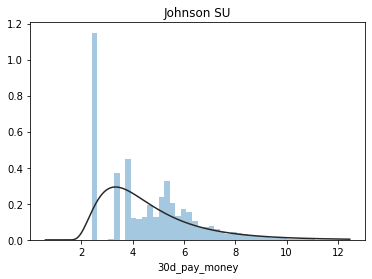

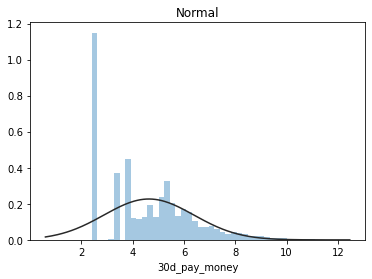

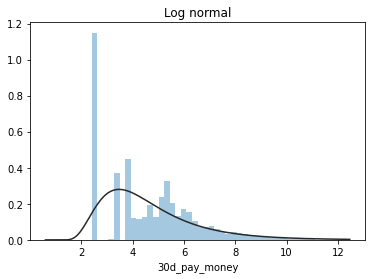

In [10]:
# 了解target总体分布情况
import scipy.stats as st
y = np.log1p(data[data['30d_pay_money'] > 0]['30d_pay_money'])
plt.figure(1);plt.title('Johnson SU')
sns.distplot(y,kde=False,fit=st.johnsonsu)
plt.figure(2);plt.title('Normal')
sns.distplot(y,kde=False,fit=st.norm)
plt.figure(3);plt.title('Log normal')
sns.distplot(y,kde=False,fit=st.lognorm)

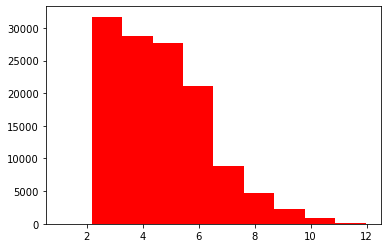

In [11]:
plt.hist(y, orientation='vertical', histtype='bar', color='red')
plt.show()

In [12]:
data[data['30d_pay_money'] >0].sort_values('30d_pay_money')

,role_id,r1,r2,r3,r4,max_role_level,p1,p2,p3,p4,...,is_create_role,is_create_no,server_sum,platform,user_type,user_flag,mobile,game_pay_num,chmoney_pay_num,30d_pay_money
4834365,147106502,5,1,1,1.05,6,2.0,2.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,0.0,2.0,1.0,2.0
3697821,152464362,42,2,3,0.97,65,2.0,2.0,0.0,0.0,...,1.0,1.0,4.0,1.0,1.0,1.0,0.0,0.0,0.0,2.0
4388064,146956711,27,1,4,1.75,82,3.0,3.0,0.0,0.0,...,1.0,0.0,3.0,1.0,2.0,1.0,1.0,0.0,0.0,3.0
929328,149117043,37,2,11,4.17,69,1.0,6.0,0.0,0.0,...,1.0,0.0,4.0,1.0,2.0,1.0,1.0,0.0,0.0,6.0
2851802,147594111,11,1,5,13.75,79,1.0,6.0,0.0,0.0,...,1.0,0.0,2.0,1.0,1.0,1.0,0.0,0.0,0.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3627605,138167916,155,1,7,1.08,0,136.0,40870.0,0.0,0.0,...,1.0,1.0,1.0,1.0,18.0,1.0,0.0,16.0,0.0,113660.0
3681396,148267118,98,1,24,1.72,76,57.0,21294.0,0.0,0.0,...,1.0,0.0,4.0,1.0,2.0,1.0,1.0,16.0,0.0,114148.0
4184642,11553032,230,1,4,0.73,1,107.0,39172.0,0.0,0.0,...,1.0,1.0,1.0,2.0,1.0,1.0,0.0,8.0,0.0,115140.0
3326035,141778777,83,1,5,2.01,77,103.0,26712.0,0.0,0.0,...,1.0,1.0,2.0,1.0,1.0,1.0,1.0,21.0,0.0,129240.0


In [13]:
# 相关性分析
d_pay_money_numeric = data[numeric_features]
correlation = d_pay_money_numeric.corr()
print(correlation['30d_pay_money'].sort_values(ascending=False),'\n')

30d_pay_money      1.000000
p2                 0.841699
p6                 0.841343
p1                 0.686403
p5                 0.686302
game_pay_num       0.235517
r1                 0.199860
r3                 0.131916
max_role_level     0.063891
r2                 0.029913
p4                 0.009049
chmoney_pay_num    0.007940
p3                 0.006376
r4                 0.006111
server_sum         0.003725
Name: 30d_pay_money, dtype: float64 



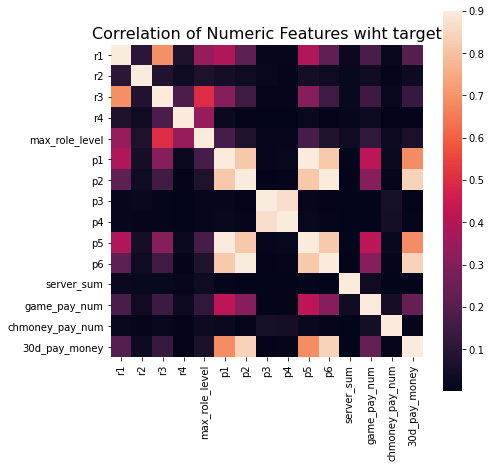

In [14]:
f, ax = plt.subplots(figsize=(7,7))
plt.title('Correlation of Numeric Features wiht target', y=1, size=16)
sns.heatmap(correlation, square=True, vmax=0.9)

In [15]:
# 查看特征偏度和峰度
for col in numeric_features:
    print('{:15}'.format(col),'   ', 
          'Skewness:{:06.2f}'.format(data[col].skew()), '        ', 
         'Kurtosis:{:06.2f}'.format(data[col].kurtosis()))

r1                  Skewness:006.59          Kurtosis:059.37
r2                  Skewness:032.88          Kurtosis:1605.41
r3                  Skewness:007.15          Kurtosis:077.91
r4                  Skewness:007.00          Kurtosis:062.37
max_role_level      Skewness:003.88          Kurtosis:017.57
p1                  Skewness:027.11          Kurtosis:1231.46
p2                  Skewness:072.38          Kurtosis:7758.62
p3                  Skewness:459.22          Kurtosis:237174.13
p4                  Skewness:469.57          Kurtosis:228839.85
p5                  Skewness:027.12          Kurtosis:1232.84
p6                  Skewness:072.55          Kurtosis:7825.13
server_sum          Skewness:042.87          Kurtosis:2547.95
game_pay_num        Skewness:063.13          Kurtosis:10197.28
chmoney_pay_num     Skewness:177.36          Kurtosis:54226.81
30d_pay_money       Skewness:081.31          Kurtosis:9698.86


In [16]:
# # 每个数字特征的分布可视化
# f = pd.melt(data, value_vars=numeric_features)
# g = sns.FacetGrid(f, col='variable', col_wrap=2, sharex=False, sharey=False)
# g = g.map(sns.distplot, 'value')

In [17]:
numeric_features.remove('30d_pay_money')
data[numeric_features].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5164372 entries, 0 to 5164371
Data columns (total 14 columns):
 #   Column           Dtype  
---  ------           -----  
 0   r1               int64  
 1   r2               int64  
 2   r3               int64  
 3   r4               float64
 4   max_role_level   int64  
 5   p1               float64
 6   p2               float64
 7   p3               float64
 8   p4               float64
 9   p5               float64
 10  p6               float64
 11  server_sum       float64
 12  game_pay_num     float64
 13  chmoney_pay_num  float64
dtypes: float64(10), int64(4)
memory usage: 551.6 MB


In [18]:
numeric_features
# p2                 0.841699
# p6                 0.841343
# p1                 0.686403
# p5                 0.686302
# game_pay_num       0.235517
# r1                 0.199860
# r3                 0.131916
# max_role_level     0.063891
# r2                 0.029913
# p4                 0.009049

['r1',
 'r2',
 'r3',
 'r4',
 'max_role_level',
 'p1',
 'p2',
 'p3',
 'p4',
 'p5',
 'p6',
 'server_sum',
 'game_pay_num',
 'chmoney_pay_num']

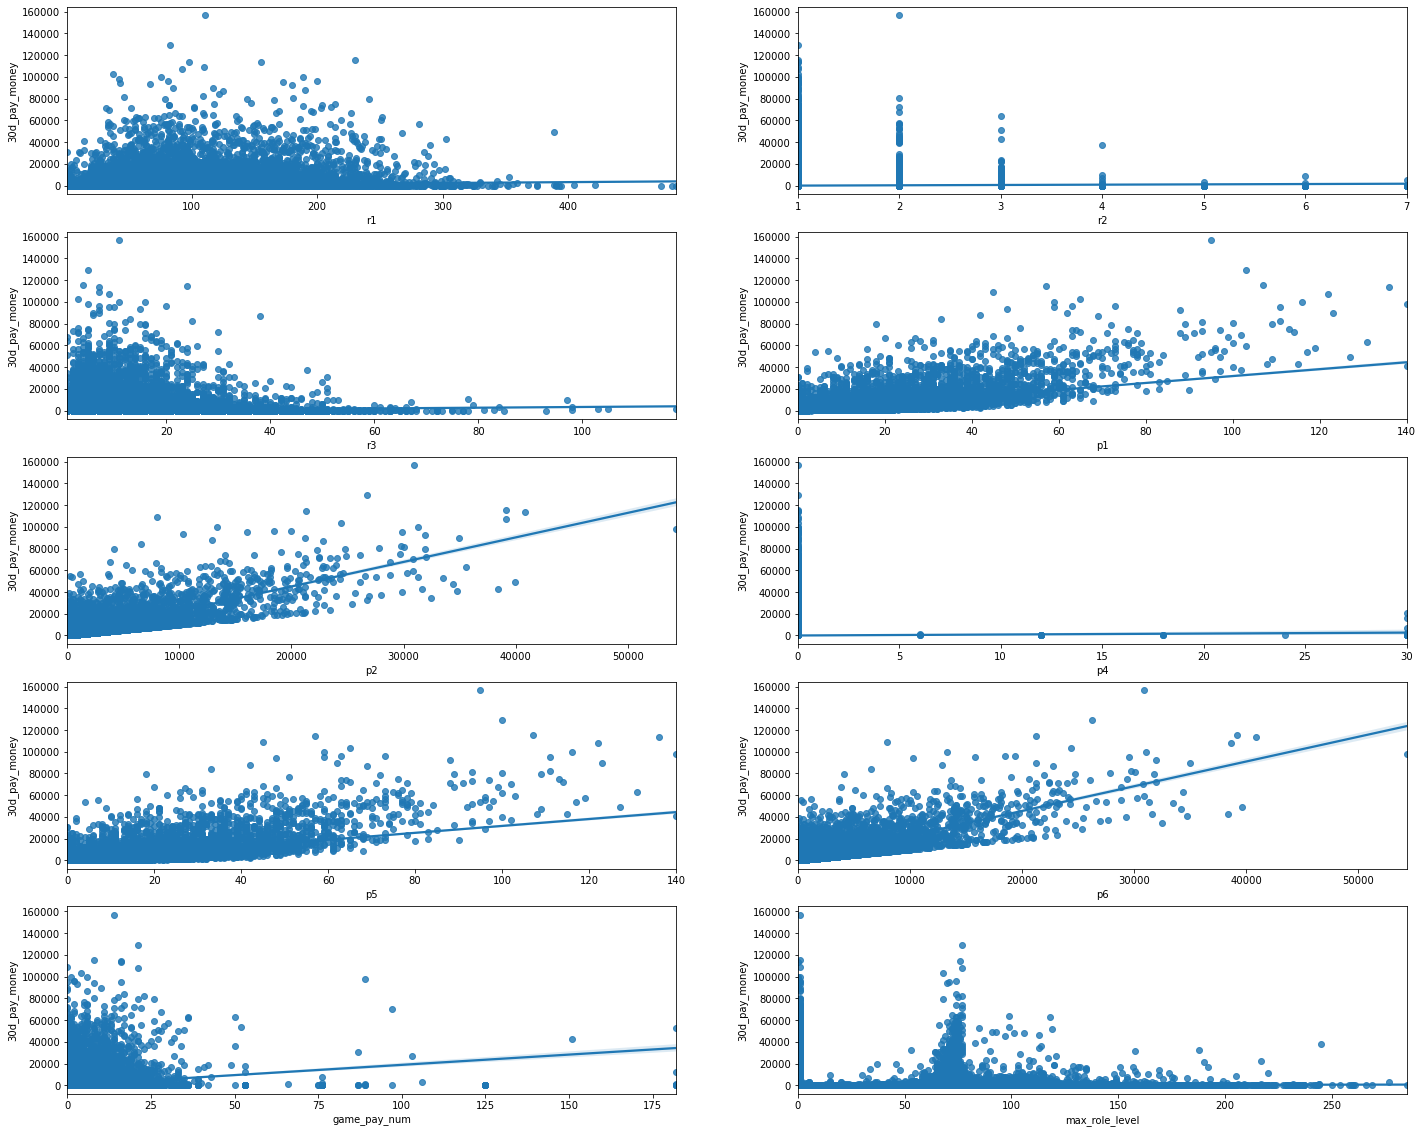

In [19]:
## 5) 多变量互相回归关系可视化
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8), (ax9, ax10)) = plt.subplots(nrows=5, ncols=2, figsize=(24, 20))
# ['r1','r2','r3','max_role_level','p1','p2','p4','p5','p6',','game_pay_num','chmoney_pay_num']
r1_scatter_plot = pd.concat([data['30d_pay_money'],data['r1']],axis = 1)
sns.regplot(x='r1',y = '30d_pay_money', data = r1_scatter_plot,scatter= True, fit_reg=True, ax=ax1)

r2_scatter_plot = pd.concat([data['30d_pay_money'],data['r2']],axis = 1)
sns.regplot(x='r2',y = '30d_pay_money', data = r2_scatter_plot,scatter= True, fit_reg=True, ax=ax2)

r3_scatter_plot = pd.concat([data['30d_pay_money'],data['r3']],axis = 1)
sns.regplot(x='r3',y = '30d_pay_money', data = r3_scatter_plot,scatter= True, fit_reg=True, ax=ax3)

p1_scatter_plot = pd.concat([data['30d_pay_money'],data['p1']],axis = 1)
sns.regplot(x='p1',y = '30d_pay_money', data = p1_scatter_plot,scatter= True, fit_reg=True, ax=ax4)

p2_scatter_plot = pd.concat([data['30d_pay_money'],data['p2']],axis = 1)
sns.regplot(x='p2',y = '30d_pay_money', data = p2_scatter_plot,scatter= True, fit_reg=True, ax=ax5)

p4_scatter_plot = pd.concat([data['30d_pay_money'],data['p4']],axis = 1)
sns.regplot(x='p4',y = '30d_pay_money', data = p4_scatter_plot,scatter= True, fit_reg=True, ax=ax6)

p5_scatter_plot = pd.concat([data['30d_pay_money'],data['p5']],axis = 1)
sns.regplot(x='p5',y = '30d_pay_money', data = p5_scatter_plot,scatter= True, fit_reg=True, ax=ax7)

p6_scatter_plot = pd.concat([data['30d_pay_money'],data['p6']],axis = 1)
sns.regplot(x='p6',y = '30d_pay_money', data = p6_scatter_plot,scatter= True, fit_reg=True, ax=ax8)

game_pay_num_scatter_plot = pd.concat([data['30d_pay_money'],data['game_pay_num']],axis = 1)
sns.regplot(x='game_pay_num',y = '30d_pay_money', data = game_pay_num_scatter_plot,scatter= True, fit_reg=True, ax=ax9)

max_role_level_scatter_plot = pd.concat([data['30d_pay_money'],data['max_role_level']],axis = 1)
sns.regplot(x='max_role_level',y = '30d_pay_money', data = max_role_level_scatter_plot,scatter= True, fit_reg=True, ax=ax10)


In [20]:
data['max_role_level'].value_counts()

0      1919242
2       929852
1       872152
4       461143
5       191602
        ...   
211          1
206          1
201          1
177          1
285          1
Name: max_role_level, Length: 251, dtype: int64

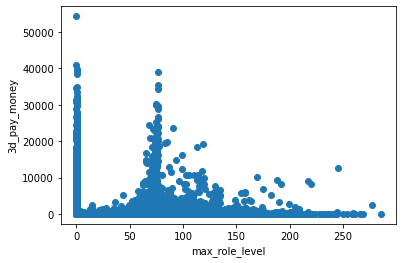

In [30]:
plt.scatter(data.max_role_level, data.p2)
plt.xlabel('max_role_level')
plt.ylabel('3d_pay_money')
plt.show()

In [28]:
data[(data['p2']>30000) & (data['max_role_level']<20)]

,role_id,r1,r2,r3,r4,max_role_level,p1,p2,p3,p4,...,is_create_role,is_create_no,server_sum,platform,user_type,user_flag,mobile,game_pay_num,chmoney_pay_num,30d_pay_money
322465,11973094,117,1,6,1.42,1,123.0,34978.0,0.0,0.0,...,1.0,1.0,1.0,2.0,1.0,1.0,0.0,0.0,0.0,89818.0
384380,137343264,33,1,5,4.97,0,117.0,31314.0,0.0,0.0,...,1.0,1.0,1.0,1.0,18.0,1.0,0.0,52.0,0.0,54010.0
511221,12013358,221,1,5,0.76,1,127.0,39972.0,0.0,0.0,...,1.0,1.0,2.0,2.0,1.0,1.0,0.0,3.0,0.0,48988.0
1257899,12101440,211,2,30,0.80,1,114.0,31964.0,0.0,0.0,...,0.0,0.0,12.0,2.0,1.0,1.0,0.0,0.0,0.0,72350.0
1723318,13454136,189,1,16,0.88,1,116.0,31288.0,0.0,0.0,...,1.0,1.0,1.0,2.0,1.0,1.0,0.0,6.0,0.0,100128.0
1840145,11939134,140,1,13,1.20,1,81.0,33520.0,0.0,0.0,...,1.0,1.0,2.0,2.0,1.0,1.0,0.0,8.0,0.0,53044.0
1850544,12333055,180,1,7,0.94,1,88.0,31954.0,0.0,0.0,...,1.0,1.0,1.0,2.0,1.0,1.0,0.0,3.0,0.0,92862.0
2245067,136776599,42,1,5,3.97,0,140.0,54324.0,0.0,0.0,...,1.0,0.0,2.0,1.0,18.0,1.0,0.0,89.0,0.0,97666.0
2541491,12481446,111,2,11,1.51,1,95.0,30904.0,0.0,0.0,...,1.0,1.0,2.0,2.0,1.0,1.0,0.0,14.0,0.0,156788.0
2981544,12192656,136,1,5,1.22,1,103.0,30866.0,0.0,0.0,...,1.0,1.0,1.0,2.0,1.0,1.0,0.0,11.0,0.0,59718.0


In [22]:
pip install pandas-profiling

Note: you may need to restart the kernel to use updated packages.


In [26]:
import pandas_profiling

In [27]:
prf = pandas_profiling.ProfileReport(data)
prf.to_file('./data_profiling.html')